# 1.Imported packages/libraries

In [2]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, cross_validate

# 2.Load the dataset and print the data information

In [3]:
#Loading the dataset into dataframe and printing the data informatioon

dataframe = pd.read_csv("/Users/sudharamanna/lectures/SEM2/Applied AI/Assignment/dataset_assignment1.csv")
print("Dataset's row and column count",dataframe.shape)
print("Data Information:")
dataframe.info()


Dataset's row and column count (700, 10)
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB


# 3.Understand the dataset

In [4]:
#Number of samples for each class in the dataset

print("Samples count of each class:")
print(dataframe['class'].value_counts())

Samples count of each class:
class
0    459
1    241
Name: count, dtype: int64


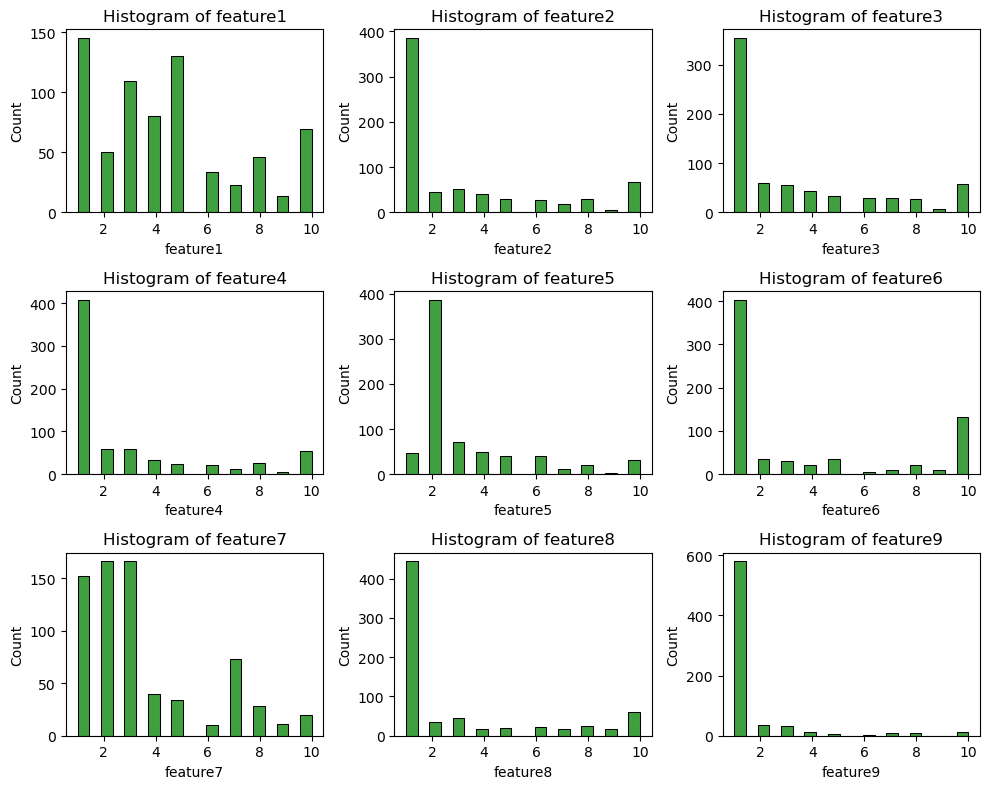

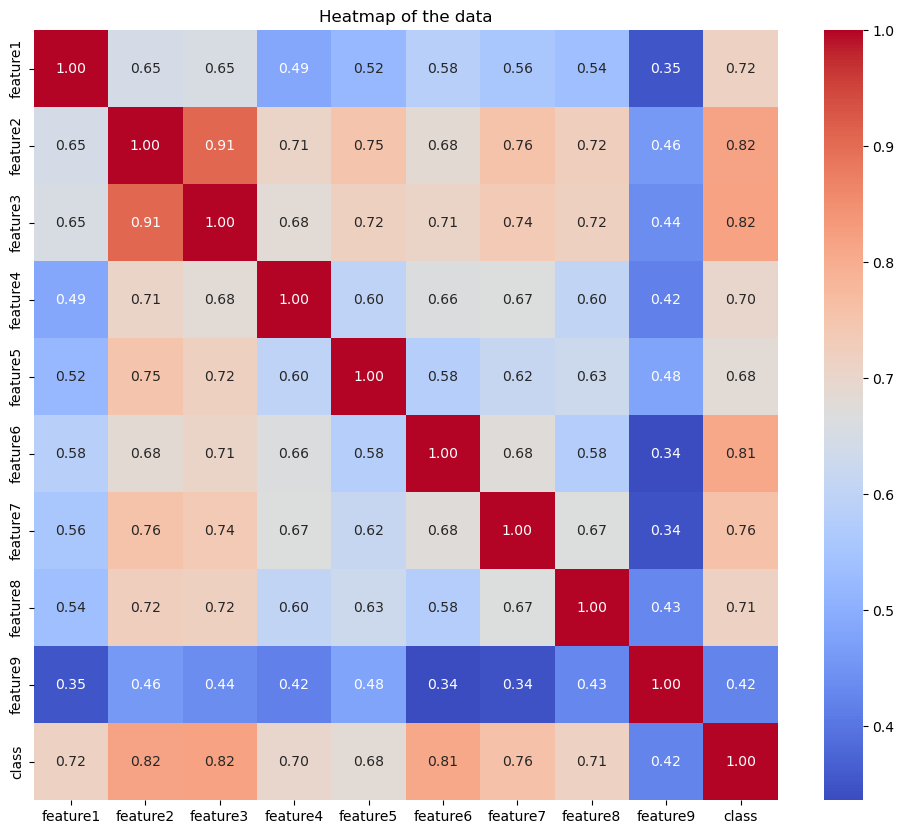

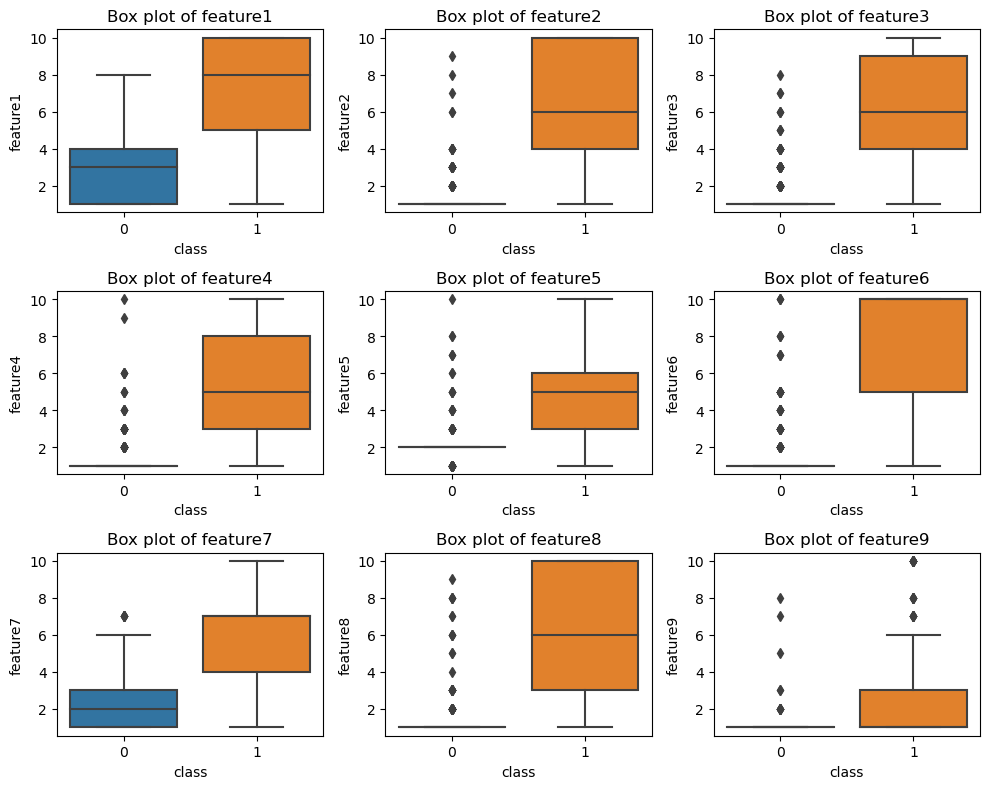

In [5]:
#Some figures to visualize the dataset

#Histogramp figures

plt.figure(figsize=(10, 8))
for index, feature in enumerate(dataframe.columns[:-1]):
    plt.subplot(3, 3, index + 1)
    sns.histplot(data=dataframe, x=dataframe[feature], bins=20, kde=False, color='green')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

#Heatmap figure

plt.figure(figsize=(12,10))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of the data')
plt.show()

#Box plots figures

plt.figure(figsize=(10,8))
for index, feature in enumerate(dataframe.columns[:-1]):
    plt.subplot(3, 3, index+1)
    sns.boxplot(y=dataframe[feature], x=dataframe['class'])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

In [6]:
#Statistical description of features for each class.

statDescription = dataframe.groupby('class')
for eachclass, features in statDescription:
    print(f"\nStatistical Description for Class {eachclass}:")
    print(features.drop(columns = 'class').describe())


Statistical Description for Class 0:
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8    feature9  
count  459.000000  459.000000  459.000000  
mean     2.102397    1.289760    1.063181  
std      1.079976    1.057787    0.501456  
min      1.000000    1.000000    1.000000  
25%      1.0

# 4.Randomly spliting data into a training dataset and testing dataset(i.e, 80% vs 20%)

In [7]:
#From the data set extracting features as (X) and class as(Y).

X = dataframe.drop('class', axis=1)
y = dataframe['class'].values

#splitting data into 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 5.Classification Algorithm

# Random Forest

Training Accuracy:1.0
Testing Accuracy:0.9642857142857143
Prediction:
[0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1
 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0]
Accuracy of Random forest model: 0.9642857142857143
Precision of Random forest model: 0.9555555555555556
Recall of Random forest model: 0.9347826086956522
f1 of Random forest model: 0.945054945054945
Classification Report of Random forest model 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        94
           1       0.96      0.93      0.95        46

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Confusion matrix of Random forest model: 
[[92  2]
 [ 3 43]]


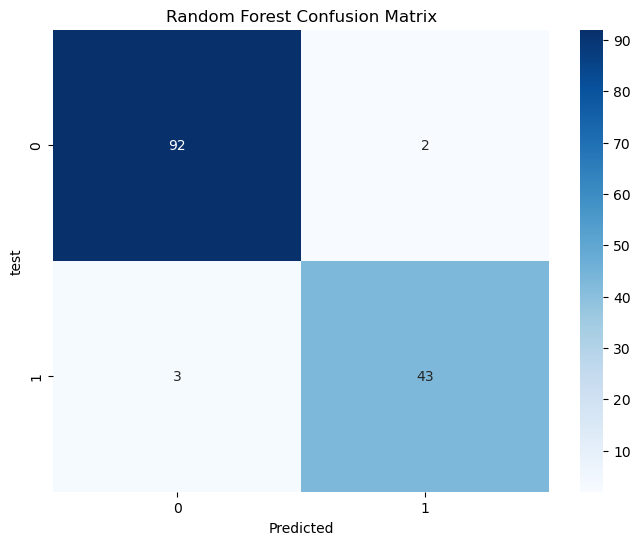

In [23]:
#Training the model using the training dataset
randomforestmodel = RandomForestClassifier(n_estimators = 120).fit(X_train, y_train)

#Evaluating the model
train_accuracy = randomforestmodel.score(X_train, y_train)
test_accuracy = randomforestmodel.score(X_test, y_test)
y_prediction = randomforestmodel.predict(X_test)

print(f"Training Accuracy:{train_accuracy}")
print(f"Testing Accuracy:{test_accuracy}")
print(f"Prediction:\n{y_prediction}")

#Different evaluation metrics
#Accuracy
print(f"Accuracy of Random forest model: {accuracy_score(y_test, y_prediction)}")

#Precision
print(f"Precision of Random forest model: {precision_score(y_test, y_prediction)}")

#recall
print(f"Recall of Random forest model: {recall_score(y_test, y_prediction)}")

#f1 Score
print(f"f1 of Random forest model: {f1_score(y_test, y_prediction)}")

#Classification Report
print(f"Classification Report of Random forest model \n{classification_report(y_test, y_prediction)}")

#Confusion matrix
print(f"Confusion matrix of Random forest model: \n{confusion_matrix(y_test, y_prediction)}")

#Plot Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_prediction), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('test')
plt.title('Random Forest Confusion Matrix')
plt.show()

# KNN

Best Score:  0.9514033896386838
Best Parameter:  {'n_neighbors': 5}
Best Testing score:  0.9857142857142858
Accuracy of KNN model: 98.57142857142858
Precision of KNN model: 97.82608695652173
Recall of KNN model: 97.82608695652173
f1 of KNN model: 97.82608695652173
Classification Report of KNN model 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        94
           1       0.98      0.98      0.98        46

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140

Confusion matrix of KNN model: 
[[93  1]
 [ 1 45]]


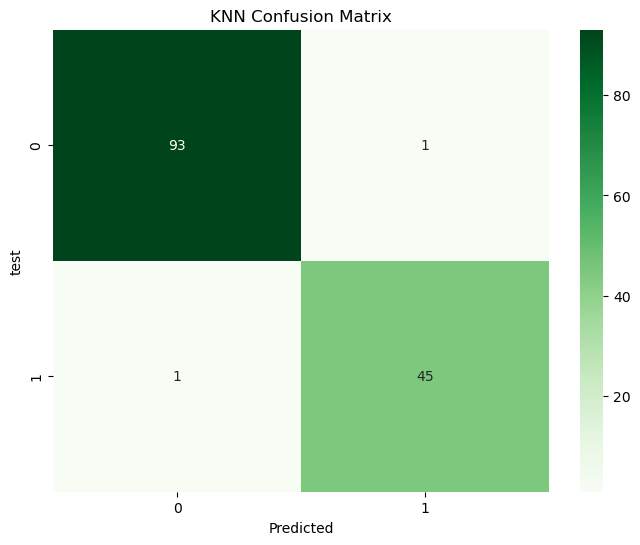

In [25]:
#Creatiing a parameter grid for hyperparameter tuning.
grid_parameter = {'n_neighbors': np.arange(1,10)}

#Defining K-fold cross validation.
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

#Creating KNN model by KNeighborsClassifier() and using GridSearchCV performing hyperparameter tuning.
hyper = GridSearchCV(KNeighborsClassifier(), grid_parameter, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = kfold, refit = 'f1')
hyper.fit(X_train, y_train)

#Printing the best score and best parameter
print(f"Best Score: ", hyper.best_score_)
print(f"Best Parameter: ",hyper.best_params_)

#Evaluating the KNN model using best parameter
bestKNNmodel = (KNeighborsClassifier(n_neighbors = hyper.best_params_['n_neighbors'])).fit(X_train, y_train)
besttestingscore = bestKNNmodel.score(X_test, y_test)
print(f"Best Testing score: ",besttestingscore)

#predicting the testing dataset response
y_prediction = bestKNNmodel.predict(X_test)

#Different evaluation metrics
#Accuracy
print(f"Accuracy of KNN model: {accuracy_score(y_test, y_prediction)*100}")

#Precision
print(f"Precision of KNN model: {precision_score(y_test, y_prediction)*100}")

#recall
print(f"Recall of KNN model: {recall_score(y_test, y_prediction)*100}")

#f1 Score
print(f"f1 of KNN model: {f1_score(y_test, y_prediction)*100}")

#Classification Report
print(f"Classification Report of KNN model \n{classification_report(y_test, y_prediction)}")

#Confusion matrix
print(f"Confusion matrix of KNN model: \n{confusion_matrix(y_test, y_prediction)}")

#Plot Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_prediction), annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('test')
plt.title('KNN Confusion Matrix')
plt.show()
